In [2]:
import fastai
import torch

print(fastai.__version__)
print(torch.__version__)

2.7.15
2.3.0+cpu


In [2]:
import pandas as pd
import numpy as np

In [ ]:
!pip install kaggle

In [4]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sigmabaxti","key":"761cb7c4b7b12a9a822bd3de93aeec82"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d paultimothymooney/kermany2018

100% 10.8G/10.8G [02:42<00:00, 58.5MB/s]
100% 10.8G/10.8G [02:42<00:00, 71.8MB/s]


In [ ]:
!unzip kermany2018.zip

In [9]:
from fastai.vision.all import *
from ipywidgets import widgets

# path - biz ishlatmoqchi bo'lgan papka haqida malumotni saqlaymiz va ishlatamiz
path = Path('/content/OCT2017 /train')

In [10]:
path1 = Path("/content/OCT2017 /test")
# files - path ni ichida nechta fayl yani rasmlarni yuklab olganligimiz haqida malumot
files1 = get_image_files(path1)
files1

(#968) [Path('/content/OCT2017 /test/DME/DME-7939555-3.jpeg'),Path('/content/OCT2017 /test/DME/DME-563695-1.jpeg'),Path('/content/OCT2017 /test/DME/DME-7907461-1.jpeg'),Path('/content/OCT2017 /test/DME/DME-2630113-1.jpeg'),Path('/content/OCT2017 /test/DME/DME-7939555-5.jpeg'),Path('/content/OCT2017 /test/DME/DME-3722280-1.jpeg'),Path('/content/OCT2017 /test/DME/DME-7706610-2.jpeg'),Path('/content/OCT2017 /test/DME/DME-98994-2.jpeg'),Path('/content/OCT2017 /test/DME/DME-8167779-1.jpeg'),Path('/content/OCT2017 /test/DME/DME-7939555-2.jpeg')...]

In [11]:
# files - path ni ichida nechta fayl yani rasmlarni yuklab olganligimiz haqida malumot
files = get_image_files(path)
files

(#83484) [Path('/content/OCT2017 /train/DME/DME-2834689-5.jpeg'),Path('/content/OCT2017 /train/DME/DME-4759696-7.jpeg'),Path('/content/OCT2017 /train/DME/DME-670450-7.jpeg'),Path('/content/OCT2017 /train/DME/DME-8602716-126.jpeg'),Path('/content/OCT2017 /train/DME/DME-4376118-6.jpeg'),Path('/content/OCT2017 /train/DME/DME-4989358-8.jpeg'),Path('/content/OCT2017 /train/DME/DME-7434518-6.jpeg'),Path('/content/OCT2017 /train/DME/DME-4242335-215.jpeg'),Path('/content/OCT2017 /train/DME/DME-5497895-23.jpeg'),Path('/content/OCT2017 /train/DME/DME-405804-13.jpeg')...]

In [12]:
# failed - bu fayni yani biror bir rasmni yuklashda muammo bo'lganda xabar beradi
failed = verify_images(path)
failed

'PosixPath' object is not iterable


(#0) []

In [13]:
# datablock yaratib olamiz
aralash = DataBlock(
    # CategoryBlock - bu rasmlarimiz kategoriyalarga ajraltish
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    #splitter - bu datamizni train va test setlarga ajratib beradi
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    # parent_label - bu barcha rasmlarimiz uchun tepasiga class nomini yozib ishlatadi
    get_y = parent_label,
    # Resize - bu rasmlarimizni 224x224 o'lchamda to'g'rilab oladi, chunki ko'p modellar shu o'lchamda moslashgan
    item_tfms=Resize(224)
)

In [14]:
# downloaders yaratamiz
dls = aralash.dataloaders(path)

In [15]:
# O'qitish (train) - modelimizni foydaliligini ko'ramiz
# CNNlearner modeli - Convolutional Neural network
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(2)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 99.6MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.492325,0.381441,0.860625,12:20


epoch,train_loss,valid_loss,accuracy,time
0,0.179621,0.129869,0.955738,13:25
1,0.112816,0.099720,0.966339,13:30


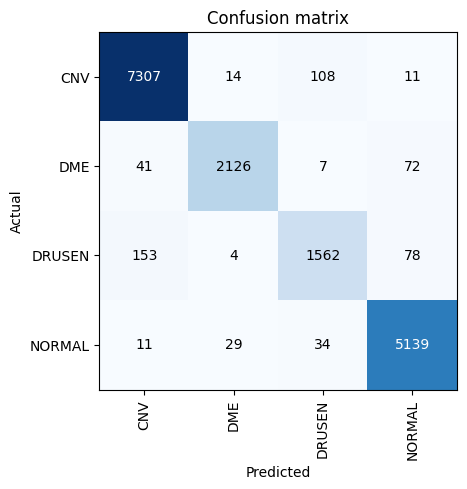

In [16]:
matritsa = ClassificationInterpretation.from_learner(learn)
matritsa.plot_confusion_matrix()

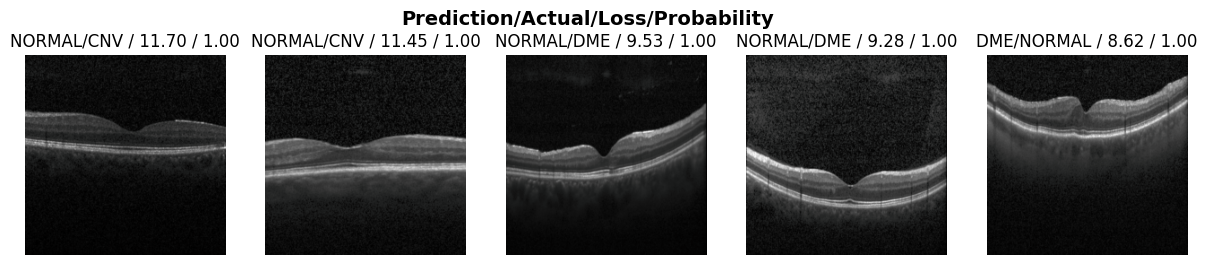

In [17]:
matritsa.plot_top_losses(5, nrows=1)

In [18]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat -> CNV
Aniqlilik ehtimolligi -> 99.9 %


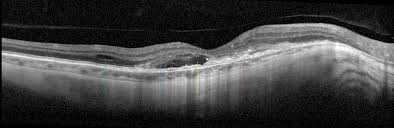

In [20]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)

print(f"Bashorat -> {pred}")
print(f"Aniqlilik ehtimolligi -> {probs[pred_id] * 100:.1f} %")
img

-------
.pkl
---------

In [24]:
learn.export("Koz_model.pkl")

In [26]:
model = load_learner("/content/Koz_model.pkl")

In [27]:
model.predict(img)

('CNV', tensor(0), tensor([9.9873e-01, 1.1087e-03, 1.4262e-04, 1.4724e-05]))